<div 
    class="alert alert-block"
    style="border-radius:10px; text-align:center; background:#f2e9ee; font-family:Times new roman; font-size:30px"
>
    Elmas Fiyat Tahmini
</div>

<img style="border-radius:10px" src="https://bilimfili.com/images/3495/cover/oda-sicakliginda-elmas-uretmek-bilimfilicom.jpeg?1586647713" title="Diamond"/>

<div 
    class="alert alert-block"
    style="border-radius:10px; text-align:center; background:#f2e9ee; font-family:Times new roman; font-size:20px"
>
    İçindekiler
</div>

<div
    style="font-family:Times new roman; font-size:18px"
>
    <ol>
        <li style="padding-bottom:5px">Giriş</li>
        <li style="padding-bottom:5px">Gerekli Kütüphaneleri İçe Aktarma</li>
        <li style="padding-bottom:5px">Veri Yükleme ve Veri Ön İşleme</li>
        <li style="padding-bottom:5px">Keşifsel Veri Analizi</li>
        <li style="padding-bottom:5px">Kodlama ve Normalizasyon</li>
        <li style="padding-bottom:5px">Modelleme</li>
        <li style="padding-bottom:5px">Modelleri Karşılaştırma</li>
    </ol>
</div>

<div 
    class="alert alert-block"
    style="border-radius:10px; text-align:center; background:#f2e9ee; font-family:Times new roman; font-size:20px"
>
    Giriş
</div>

Bu çalışma, yaklaşık 54.000 yuvarlak kesim pırlanta için fiyatları ve nitelikleri içeren bir veri setini araştırmaktadır.</br>
Veri setinde 10 özelliğe (karat, kesim, renk, berraklık, derinlik, tablo, fiyat, x, y, z) sahip 53.940 pırlanta bulunmaktadır.</br>
Amaç, farklı Regresyon algoritmaları kullanılarak pırlantanın diğer özelliklerine göre fiyatını tahmin etmektir.</br>

<div
    style="font-family:Times new roman; font-size:18px"
>
<strong>Öznitelikler</strong>
    <ul>
        <li style="padding-bottom:5px;">Carat(Karat) : Elmas ağırlığı</li>
        <li style="padding-bottom:5px">Cut(Kesim) : Kesim kalitesi</li>
        <li style="padding-bottom:5px">Color(Renk) : Elmas rengi</li>
        <li style="padding-bottom:5px">Clarity(Berraklık) : Elmasın ne kadar net olduğunu, şeffaflığını ölçmek</li>
        <li style="padding-bottom:5px">Table(Tablo) : Bir elmasın tepesinin genişliği</li>
        <li style="padding-bottom:5px">Price(Fiyat) : Dolar cinsinden elmas fiyatı</li>
        <li style="padding-bottom:5px">X(Uzunluk) : Elmasın mm cinsinden uzunluğu</li>
        <li style="padding-bottom:5px">Y(Genişlik) : Elmasın mm cinsinden genişliği</li>
        <li style="padding-bottom:5px">Z(derinlik) : Elmasın mm cinsinden derinliği</li>
        <li style="padding-bottom:5px">Depth(Derinlik) : Toplam derinlik yüzdesi | Toplam Derinlik % = z / mean(x, y) or z * 2 / (x + y)</li>
    </ul>
</div>

<div 
    class="alert alert-block"
    style="border-radius:10px; text-align:center; background:#f2e9ee; font-family:Times new roman; font-size:20px"
>
    Gerekli Kütüphaneleri İçe Aktarma
</div>

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri Ön İşleme
from sklearn.preprocessing import LabelEncoder

# Ölçeklendirme ve Bölme
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelleme
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Değerlendirme
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

<div 
    class="alert alert-block"
    style="border-radius:10px; text-align:center; background:#f2e9ee; font-family:Times new roman; font-size:20px"
>
    Veri Yükleme ve Veri Ön İşleme
</div>

In [159]:
df = pd.read_csv('./Diamonds Prices2022.csv')

In [160]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<blockquote style="font-size:16px"><b>Unnamed:0</b> sütunu silinir.</blockquote>

In [161]:
df = df.drop(['Unnamed: 0'],axis=1)

In [162]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<blockquote style="font-size:16px">3 sütun (cut, color, clarity) dışında, diğer tüm özellikler sayısal tipe sahiptir, bu nedenle tip dönüşümü gerekmez</blockquote>

In [164]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<blockquote style="font-size:16px">Boş değer yoktur. Bu yüzden veri temizliği ve doldurma gerekmez.</blockquote>

In [165]:
df.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<div 
    class="alert alert-block"
    style="border-radius:10px; text-align:center; background:#f2e9ee; font-family:Times new roman; font-size:20px"
>
    Keşifsel Veri Analizi
</div>

In [166]:
for col in df.columns:
    if df[col].nunique() < 10:
        print(col,df[col].unique())

cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


<blockquote style="font-size:16px">3 sütun kategorik veriler içermektedir onları regresyon uygulamak amacıyla tam sayılara kodladık.</blockquote>

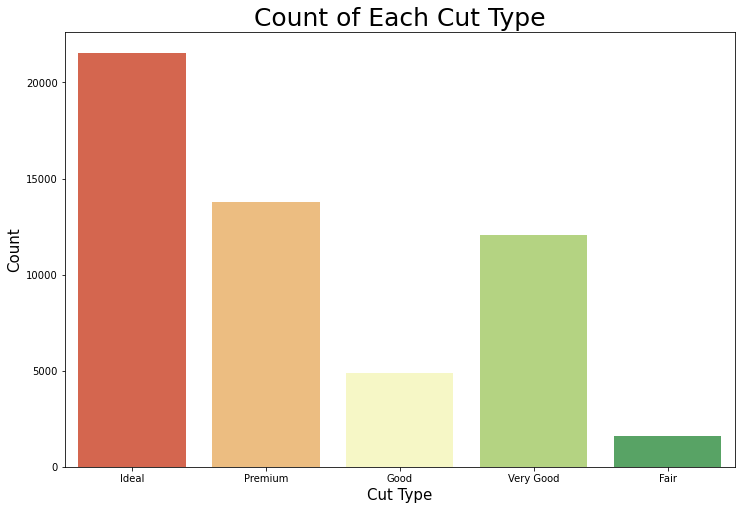

In [167]:
plt.figure(figsize=(12,8));
sns.countplot(x='cut',data=df,palette='RdYlGn');
plt.title('Count of Each Cut Type',fontsize=25,fontweight=5);
plt.xlabel('Cut Type',fontsize=15,fontweight=3);
plt.ylabel('Count',fontsize=15,fontweight=3);

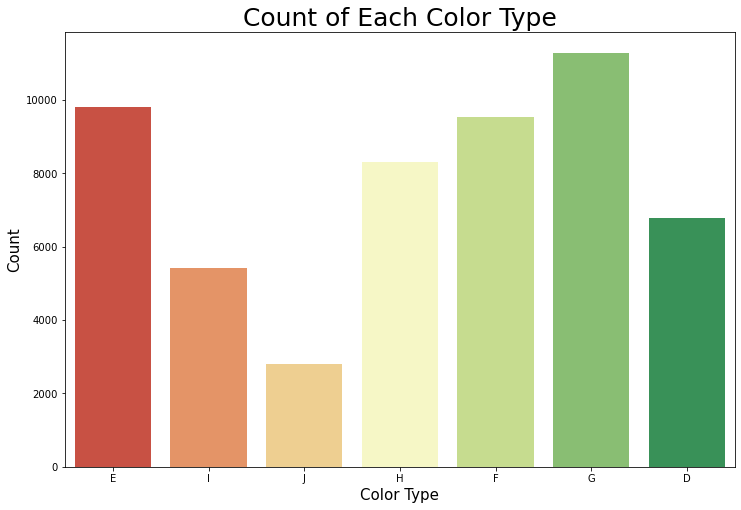

In [168]:
plt.figure(figsize=(12,8));
sns.countplot(x='color',data=df,palette='RdYlGn');
plt.title('Count of Each Color Type',fontsize=25,fontweight=5);
plt.xlabel('Color Type',fontsize=15,fontweight=3);
plt.ylabel('Count',fontsize=15,fontweight=3);

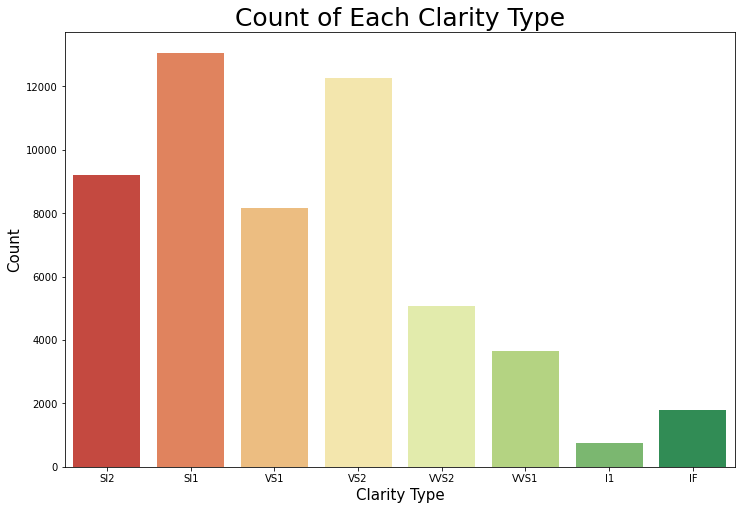

In [169]:
plt.figure(figsize=(12,8));
sns.countplot(x='clarity',data=df,palette='RdYlGn');
plt.title('Count of Each Clarity Type',fontsize=25,fontweight=5);
plt.xlabel('Clarity Type',fontsize=15,fontweight=3);
plt.ylabel('Count',fontsize=15,fontweight=3);

In [170]:
encoder = LabelEncoder()

In [171]:
df['cut'] = encoder.fit_transform(df['cut'])
df['color'] = encoder.fit_transform(df['color'])
df['clarity'] = encoder.fit_transform(df['clarity'])

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  int32  
 2   color    53943 non-null  int32  
 3   clarity  53943 non-null  int32  
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.5 MB


<blockquote style="font-size:16px">Artık tüm verilerimiz sayısal tipte</blockquote>

<div 
    class="alert alert-block"
    style="border-radius:10px; text-align:center; background:#c8dcf0; font-family:Times new roman; font-size:20px"
>
    Korelasyon Isı Haritası
</div>

<blockquote style="font-size:16px">
Korelasyon, iki özellik arasındaki ilişkiyi bulmak için kullanılır.</br>
0,5'ten büyük bir değer, güçlü pozitif korelasyonu gösterirken -0,5'ten büyük bir değer, güçlü negatif korelasyonu gösterir.
</blockquote>

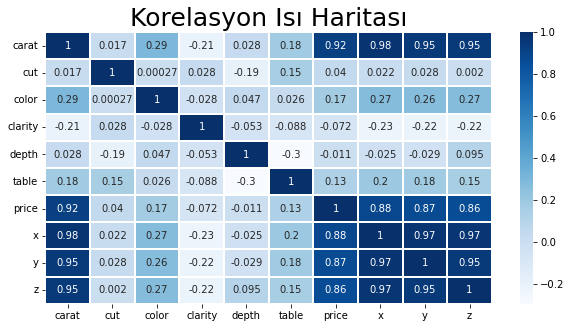

In [173]:
plt.figure(figsize=(10,5));
sns.heatmap(df.corr(),annot=True,cmap='Blues',linewidth=0.01);
plt.title('Korelasyon Isı Haritası',fontsize=25,fontweight=5);

<blockquote style="font-size:16px">Problemimiz elmas fiyat tahmini yapmaktadır. Bu nedenle, korelasyon matrisindeki 
fiyat özelliğine bakarsak, bunun carat, x, y ve z özellikleriyle yüksek oranda ilişkili olduğunu görebiliriz.</blockquote>

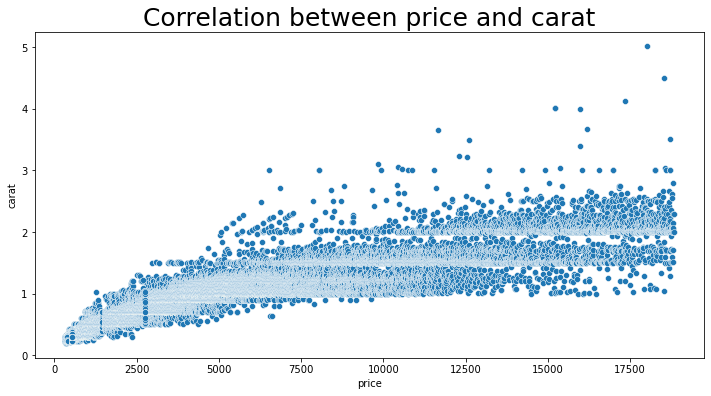

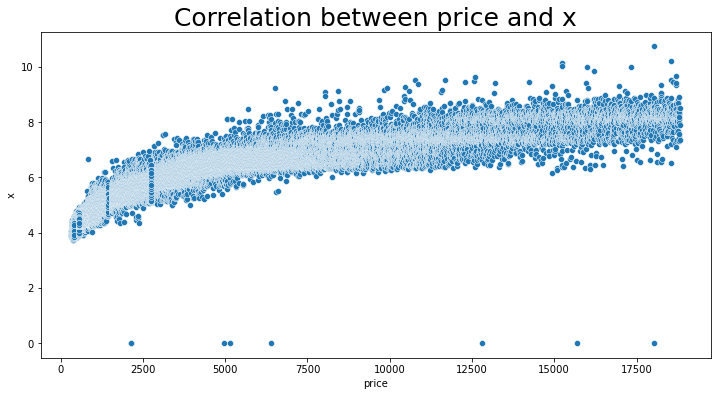

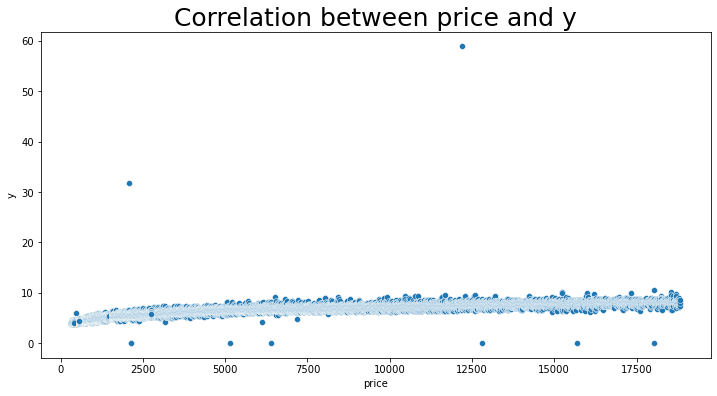

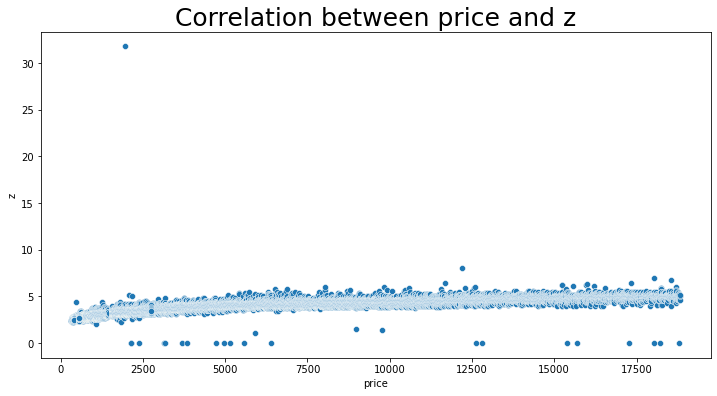

In [174]:
for col in ['carat','x','y','z']:
    plt.figure(figsize=(12,6));
    sns.scatterplot(x='price',y=col,data=df,palette='cool');
    plt.title(f'Correlation between price and {col}',fontsize=25,fontweight=5);
    plt.show()

<div 
    class="alert alert-block"
    style="border-radius:10px; text-align:center; background:#c8dcf0; font-family:Times new roman; font-size:20px"
>
    Box Plot
</div>

<blockquote style="font-size:16px">
Kutu Grafiği, çok büyük veya çok küçük olan aykırı değerleri veya değerleri bulmak için kullanılır. Bu değerler, regresyon 
modelimizin performansını etkileyebilir.
</blockquote>

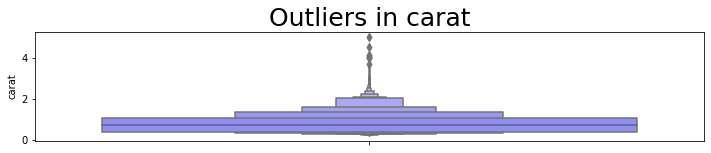

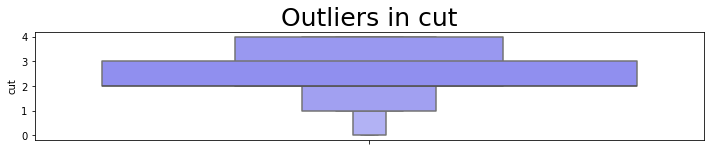

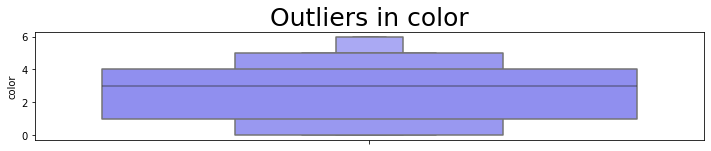

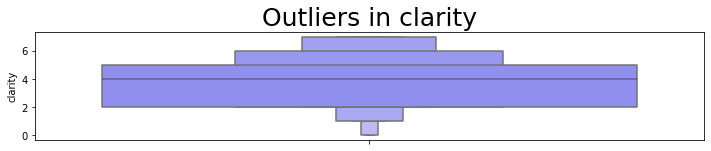

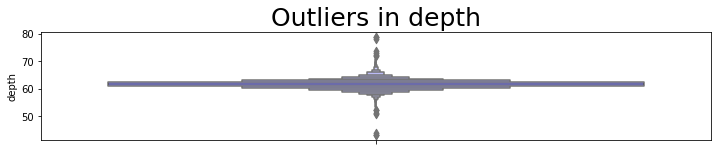

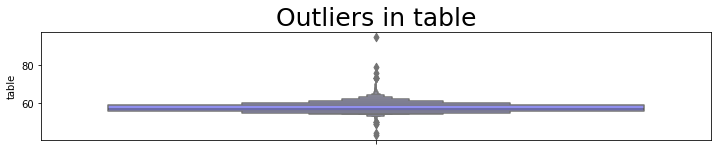

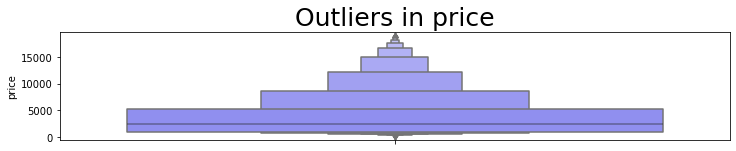

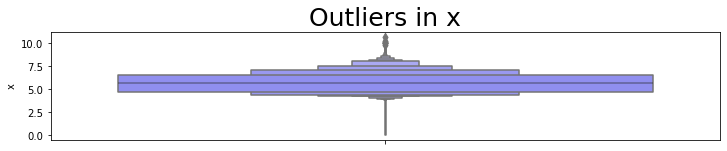

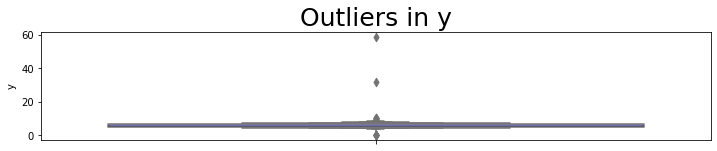

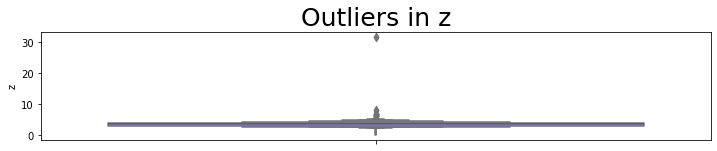

In [175]:
for col in df.columns:
    plt.figure(figsize=(12,2));
    sns.boxenplot(y=col,data=df,palette='cool');
    plt.title(f'Outliers in {col}',fontsize=25,fontweight=5);
    plt.show()

<img style="border-radius:10px" src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png"/>

<blockquote style="font-size:16px">
Bir kutu grafiği, IQR'yi yani çeyrekler arası aralığı bulur. Verilerin çoğu bu aralıkta yer alır. Q1 ve Q3 değerlerine göre
minimum ve maksimum değerler hesaplanır.(Bu değerler minimum değerler değildir.)
</blockquote>

<blockquote style="font-size:16px">
Aykırı değerlerin çoğunu Q1,Q3 değerlerini kullanarak kaldırıyoruz.
</blockquote>

In [176]:
for col in df.columns:
    # Özellik için Q1 hesaplanması
    q1 = df[col].quantile(0.25)
    # Özellik için Q3 hesaplaması
    q3 = df[col].quantile(0.75)
    
    # IQR değerinin hesaplanması
    iqr = q3-q1
    # IQR'ye göre minimum/maksimum değeri hesaplama
    minn = q1-1.5*iqr
    maxx = q3+1.5*iqr
    
    # Değerleri yalnızca minimum-maksimum aralığında filtreleme
    df = df[(df[col] >= minn) & (df[col] <= maxx)]

In [177]:
df.shape

(46599, 10)

<blockquote style="font-size:16px">
Aykırı değerlerin çoğunu kaldırdıktan sonra yaklaşık 7000 satırımzı kaybettik. 
Fakat hala modelleme için fazlasıyla verimiz bulunuyor.
</blockquote>

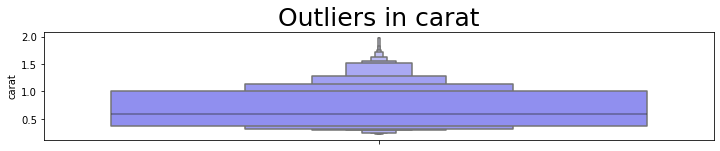

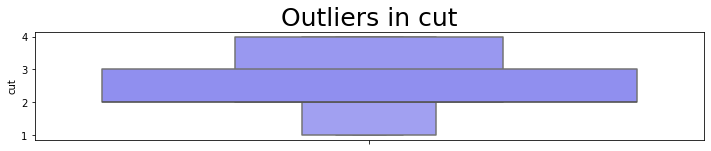

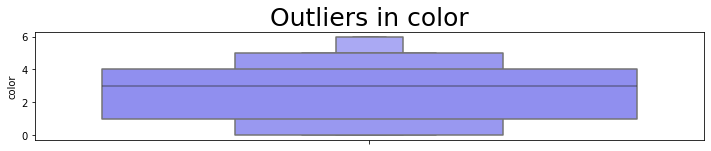

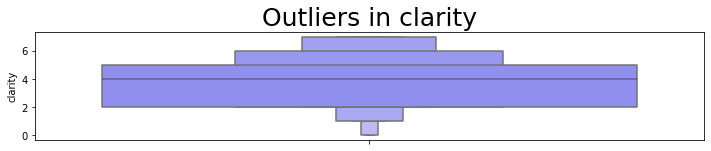

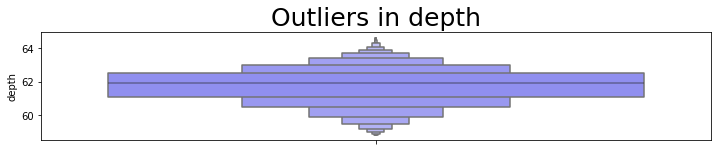

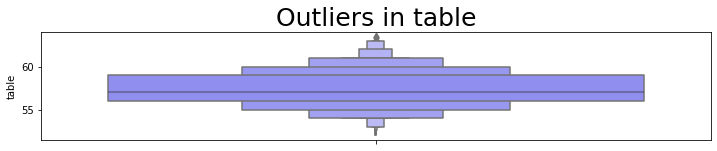

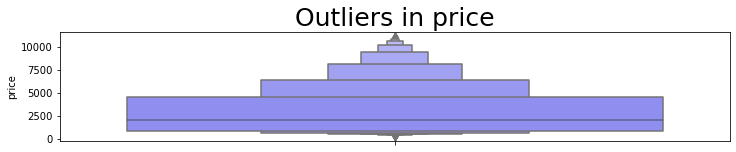

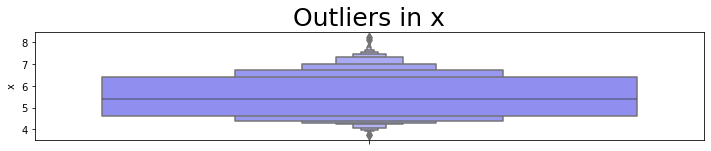

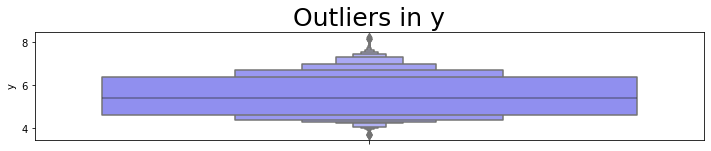

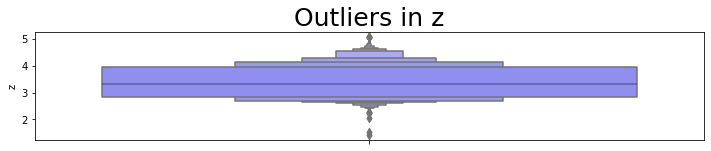

In [178]:
for col in df.columns:
    plt.figure(figsize=(12,2));
    sns.boxenplot(y=col,data=df,palette='cool');
    plt.title(f'Outliers in {col}',fontsize=25,fontweight=5);
    plt.show()

<div 
    class="alert alert-block"
    style="border-radius:10px; text-align:center; background:#f2e9ee; font-family:Times new roman; font-size:20px"
>
    Kodlama ve Normalizasyon
</div>

In [179]:
X = df.drop(['price'],axis=1)
y=df['price']

In [180]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [181]:
scaler = MinMaxScaler()

In [182]:
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)

In [183]:
normalized_x_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.472222,1.000000,0.500000,0.428571,0.644068,0.877193,0.599119,0.612200,0.719346
1,0.283333,1.000000,1.000000,0.285714,0.067797,0.526316,0.469163,0.483660,0.564033
2,0.066667,1.000000,0.166667,0.285714,0.728814,0.175439,0.149780,0.150327,0.370572
3,0.144444,0.000000,0.000000,0.714286,0.745763,0.350877,0.255507,0.270153,0.460490
4,0.455556,0.333333,0.666667,0.428571,0.508475,0.263158,0.603524,0.616558,0.708447


In [184]:
normalized_x_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

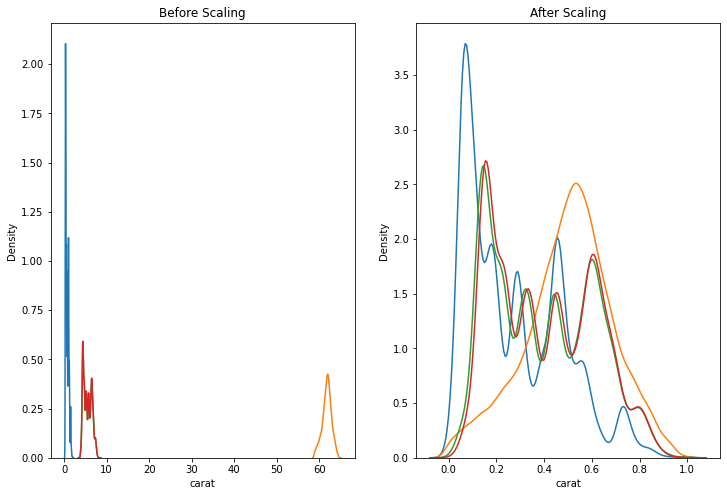

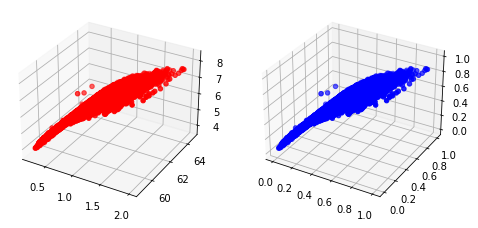

In [185]:
fig, (ob1, ob2) = plt.subplots(ncols=2,figsize=(12,8))
ob1.set_title('Before Scaling')
sns.kdeplot(X_train['carat'],ax=ob1)
sns.kdeplot(X_train['depth'],ax=ob1)
sns.kdeplot(X_train['x'],ax=ob1)
sns.kdeplot(X_train['y'],ax=ob1)

ob2.set_title('After Scaling')
sns.kdeplot(normalized_x_train['carat'],ax=ob2)
sns.kdeplot(normalized_x_train['depth'],ax=ob2)
sns.kdeplot(normalized_x_train['x'],ax=ob2)
sns.kdeplot(normalized_x_train['y'],ax=ob2)
plt.show()

fig = plt.figure(figsize=(8,6))
ob3 = fig.add_subplot(121,projection='3d')
ob4 = fig.add_subplot(122,projection='3d')
ob3.scatter(X_train['carat'],X_train['depth'],X_train['x'],color='red')
ob4.scatter(normalized_x_train['carat'],normalized_x_train['depth'],normalized_x_train['x'],color='blue')
plt.show()


<div 
    class="alert alert-block"
    style="border-radius:10px; text-align:center; background:#f2e9ee; font-family:Times new roman; font-size:20px"
>
    Modelleme
</div>

In [186]:
d={}
def metric_scores(actual,predicted,name): 
    # y_test, y_pred, model adı
    # İşlev Değerlendirme, metrik puanlarını değerlendirme ve saklamak için oluşturduğumuz bağımsız değişkenler
    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    mape = mean_absolute_percentage_error(actual,predicted)
    r2 = r2_score(actual,predicted)
    
    d[name]=[mae,mse,mape,r2]
    
    print('Mean Absolute Error : {:.3f}'.format(mae)) # Ortalama Mutlak Hata
    print()
    print('Mean Squared Error : {:.3f}'.format(mse)) # Ortalama Karesel Hata
    print()
    print('Mean Absolute Percentage Error : {:.3f}'.format(mape)) # Ortalama Mutlak Yüzde Hatası
    print()
    print('R Squared Error : {:.3f}'.format(r2)) # R Kare Hatası
    print()

In [187]:
def evaluate_model(x_test=None,y_test=None,model=None,name='Linear Regression',color='hotpink'):
    # x_test, y_test, model nesne, model adı
    # Tahmin yapmak, modeli değerlendirmek ve regresyon çizgisini çizmek için
    
    predicted = model.predict(x_test)
    actual=y_test
    metric_scores(actual,predicted,name)
    plt.figure(figsize=(12,8))
    plt.scatter(actual, predicted, c=color)
    mxp,mxa,mnp,mna = max(predicted),max(actual),np.min(predicted),np.min(actual)
    p1 = mxp if mxp>mxa else mxa
    p2 = mnp if mnp<mna else mna
    plt.plot([p1, p2], [p1, p2],'#000066')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.title(name,fontsize=30)
    plt.axis('equal')
    plt.show()

In [188]:
lr = LinearRegression()
lr.fit(normalized_x_train,y_train)

LinearRegression()

Mean Absolute Error : 572.478

Mean Squared Error : 737566.700

Mean Absolute Percentage Error : 0.282

R Squared Error : 0.890



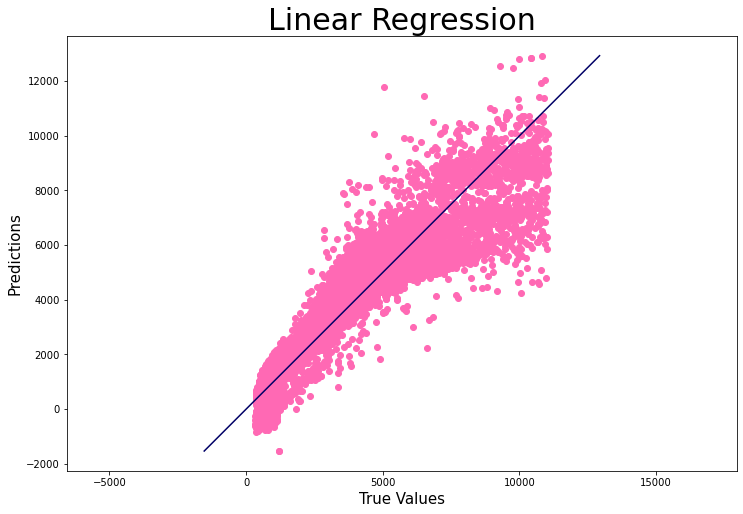

In [189]:
evaluate_model(x_test=normalized_x_test,y_test=y_test,model=lr,name='Linear Regression')

In [190]:
DR = DecisionTreeRegressor(random_state=1)
DR.fit(normalized_x_train, y_train)

DecisionTreeRegressor(random_state=1)

Mean Absolute Error : 258.501

Mean Squared Error : 224342.655

Mean Absolute Percentage Error : 0.083

R Squared Error : 0.966



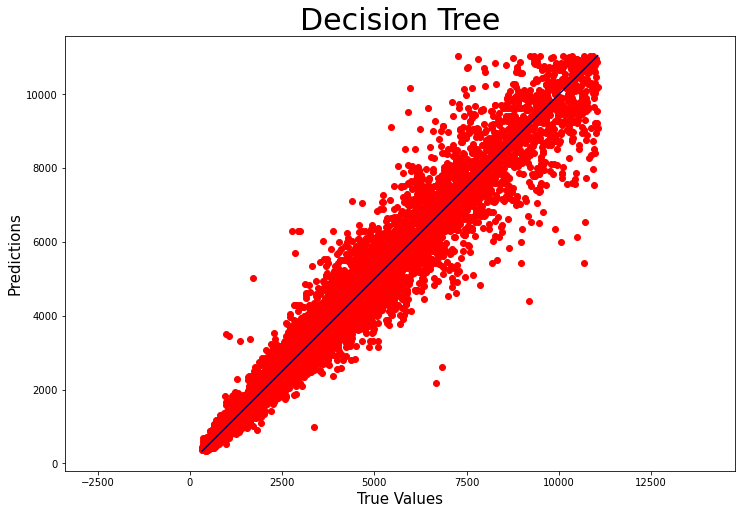

In [191]:
evaluate_model(x_test=normalized_x_test,y_test=y_test,model=DR,name='Decision Tree',color='red')

In [211]:
model=RandomForestRegressor(n_estimators=100)
model.fit(normalized_x_train, y_train)

RandomForestRegressor()

Mean Absolute Error : 192.875

Mean Squared Error : 123943.264

Mean Absolute Percentage Error : 0.062

R Squared Error : 0.981



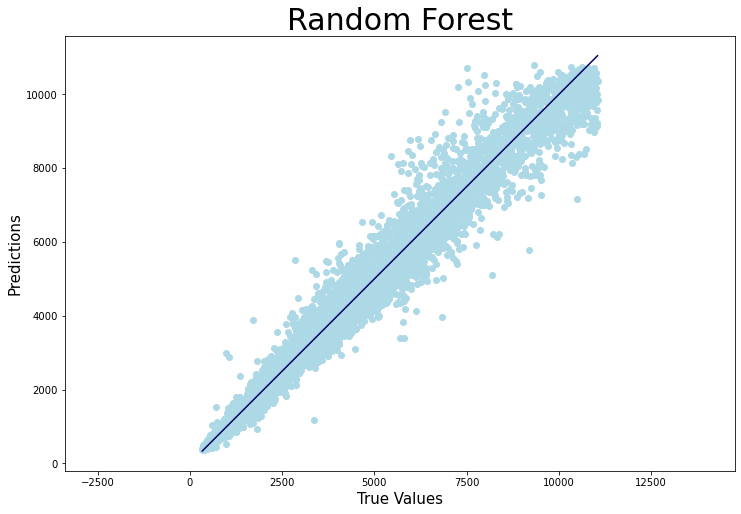

In [212]:
evaluate_model(x_test=normalized_x_test,y_test=y_test,model=model,name='Random Forest',color='lightblue')

<div 
    class="alert alert-block"
    style="border-radius:10px; text-align:center; background:#f2e9ee; font-family:Times new roman; font-size:20px"
>
    Modelleri Karşılaştırma
</div>

In [213]:
results = pd.DataFrame(d,index = ['MAE','MSE','MAPE','R2'])

In [214]:
results

,Linear Regression,Decision Tree,Random Forest
MAE,572.478408,258.500572,192.874868
MSE,737566.699874,224342.655365,123943.263785
MAPE,0.282204,0.082667,0.062021
R2,0.889613,0.966424,0.981450


In [215]:
results.loc['R2'].max()

0.9814501390292121

<blockquote style="font-size:16px; color:#1E5B98">
<b>Random Forest, %98 test R2 Puanı ile en iyi model oldu.</b>
</blockquote>